In [1]:
#import ALL THE THINGS

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
import feather
import datetime

from ema_workbench import (Model, 
                           RealParameter, 
                           Constant,
                           TimeSeriesOutcome,
                           perform_experiments, 
                           ema_logging, 
                           save_results,
                           perform_experiments, 
                           ema_logging)

#from ema_workbench.em_framework import samplers

from ema_workbench.connectors.vensim import VensimModel

#from ema_workbench.em_framework.evaluators import LHS, MC

import ema_workbench.analysis.pairs_plotting as pairs
import ema_workbench.analysis.plotting as emaplt

# turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [25]:
#define experiment parameters
uncertainties = [
                RealParameter('b0',4.5,5.5),
                RealParameter("bstep",-1,1)
            ]

outcomes =  [
                TimeSeriesOutcome('x'), 
                TimeSeriesOutcome('y')
            ]

constants = [
                Constant('x0', 0.5),
                Constant('y0', 0.5),
                Constant("a",2),
                Constant("tb",20)
            ]

In [26]:
wd = r'./'
model = VensimModel("Brusselator", wd=wd, model_file=r'201806251128_BBSD_Br_StrogatzBrusselator_ab_bsweep.vpm')

model.uncertainties = uncertainties
model.outcomes = outcomes
model.constants = constants

In [27]:
results = perform_experiments(model, 40)

experiments, outcomes = results

[MainProcess/INFO] performing 40 scenarios * 1 policies * 1 model(s) = 40 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 24 cases completed
[MainProcess/INFO] 28 cases completed
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 36 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] experiments finished


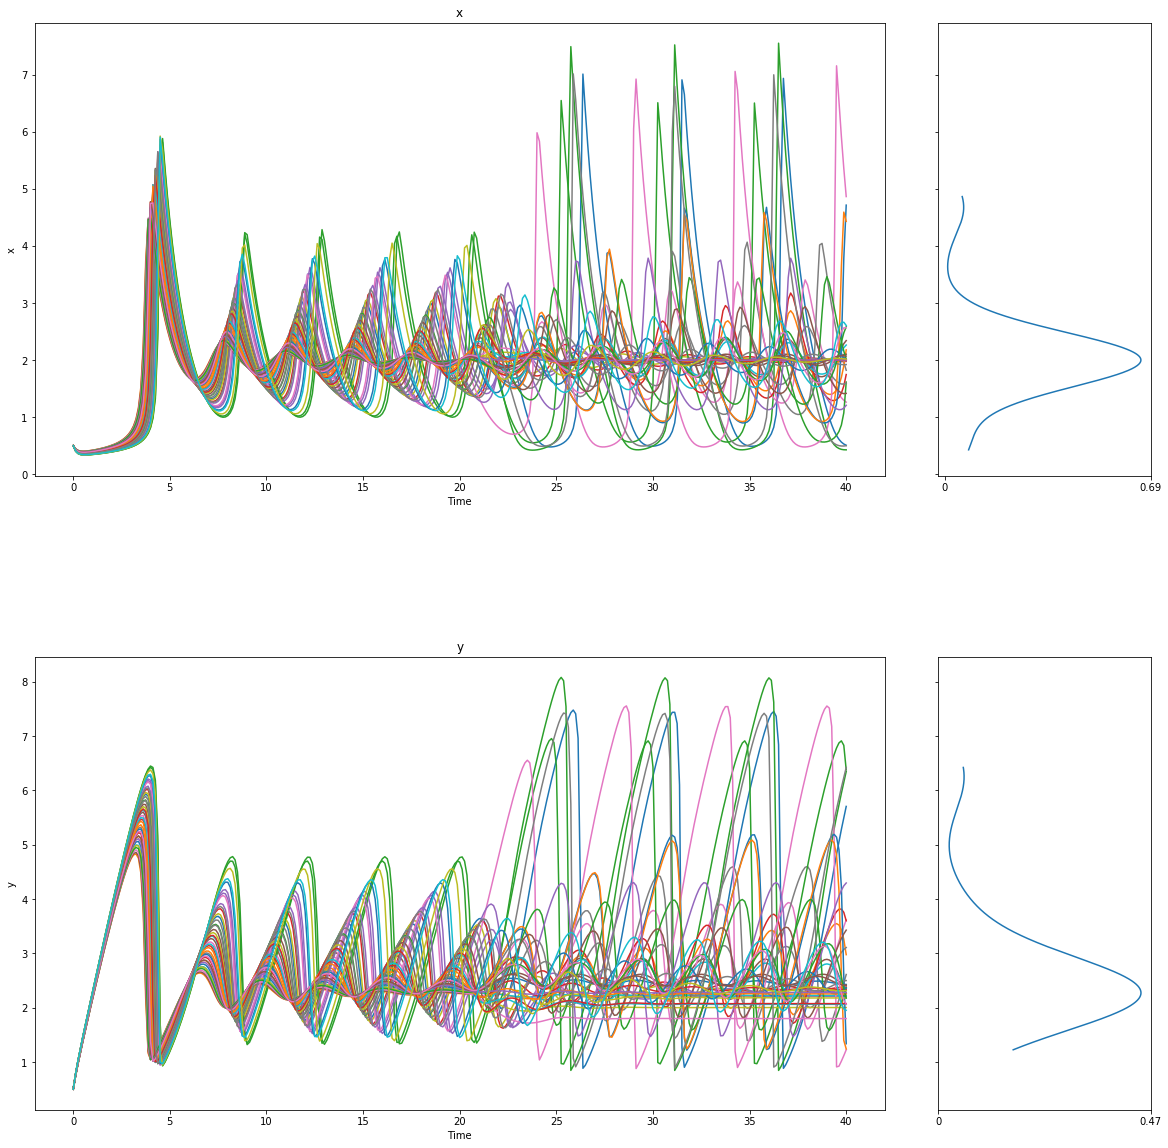

In [28]:
figure = emaplt.lines(results,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (20,20)
plt.show() #show figure

In [40]:
experiments

array([(3.95311884, -0.64334477, 2320, 'None', 'Brusselator'),
       (4.33887397, -0.18193828, 2321, 'None', 'Brusselator'),
       (4.02538168, -0.98987733, 2322, 'None', 'Brusselator'),
       (3.99111506,  0.27421866, 2323, 'None', 'Brusselator'),
       (3.8816344 , -0.0997516 , 2324, 'None', 'Brusselator'),
       (3.81570288, -0.69137698, 2325, 'None', 'Brusselator'),
       (3.8682213 ,  0.16276007, 2326, 'None', 'Brusselator'),
       (3.66787319,  0.06338853, 2327, 'None', 'Brusselator'),
       (4.42886126, -0.51468735, 2328, 'None', 'Brusselator'),
       (3.50793674, -0.32928006, 2329, 'None', 'Brusselator'),
       (4.25122796,  0.54579262, 2330, 'None', 'Brusselator'),
       (4.21067274, -0.75854654, 2331, 'None', 'Brusselator'),
       (3.5151208 ,  0.08275577, 2332, 'None', 'Brusselator'),
       (4.06708157,  0.28943839, 2333, 'None', 'Brusselator'),
       (4.03258671, -0.34939131, 2334, 'None', 'Brusselator'),
       (3.6489753 ,  0.84308325, 2335, 'None', 'Brussel

In [41]:
import datetime
df_expt = pd.DataFrame(experiments) #convert experiments (array of tuples) into df
df_expt = df_expt.copy() #self-copy to circumvent errors
path = "./Data/" + str(datetime.date.today()) + "Experiments" + '.feather' #create path for saving
feather.write_dataframe(df_expt.iloc[:,0:2],path) #feather it!

In [42]:
def export_outcomes(outcomes, location = './Data/' ):
    """takes EMA outcomes and exports all time series for each outcome of interest as a .feather dataframe for easy
    import into R. Arguments: export_outcomes(name of EMA outcomes dict, desired save location). Save location must exist,
    defaults to './Data/'.
    
    """
     
    today = datetime.date.today()
    datestr = (str(today))  
    
    keylist = list(outcomes.keys())
    
    for k in keylist:
        df_temp = pd.DataFrame(outcomes[k])
        df_temp = df_temp.copy()
        path = location + datestr + k.replace(' ','') + '.feather'
        feather.write_dataframe(df_temp,path)

    return("Done.");

In [43]:
export_outcomes(outcomes)

'Done.'